# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

training_file = 'train.p'
validation_file = 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


def convertToGrayscale(X):
    return np.mean(X, axis=3)

X_train_gray = convertToGrayscale(X_train)
X_valid_gray = convertToGrayscale(X_valid)
X_test_gray = convertToGrayscale(X_test)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_valid = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1], X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import csv
from textwrap import wrap

def wrapTitle(s):
    return '\n'.join(wrap(s, 20))

# Load sign names
signnames = {}
with open('signnames.csv') as f:
    for sn in csv.DictReader(f):
        signnames[int(sn['ClassId'])] = sn['SignName']

def showImages(images, labels):
    fig = plt.figure(figsize=(50,60))
    for i, j in enumerate(random.sample(range(len(labels)), 100)):
        plt.subplot(10, 10, i+1)
        plt.title(wrapTitle(signnames[labels[j]]), fontsize=20)
        plt.imshow(images[j])
        
def showImagesOfLabel(X, y, label, grayscale=False):
    print(signnames[label])
    fig = plt.figure(figsize=(50,60))
    images = [i for i in range(len(y)) if y[i] == label]
    print(len(images))
    images = images if len(images) <= 100 else random.sample(images, 100)
    
    for i, j in enumerate(images):
        plt.subplot(10, 10, i+1)
        plt.title('%d %d' % (j, y[j]), fontsize=20)
        plt.imshow(X[j], cmap='gray' if grayscale else None)

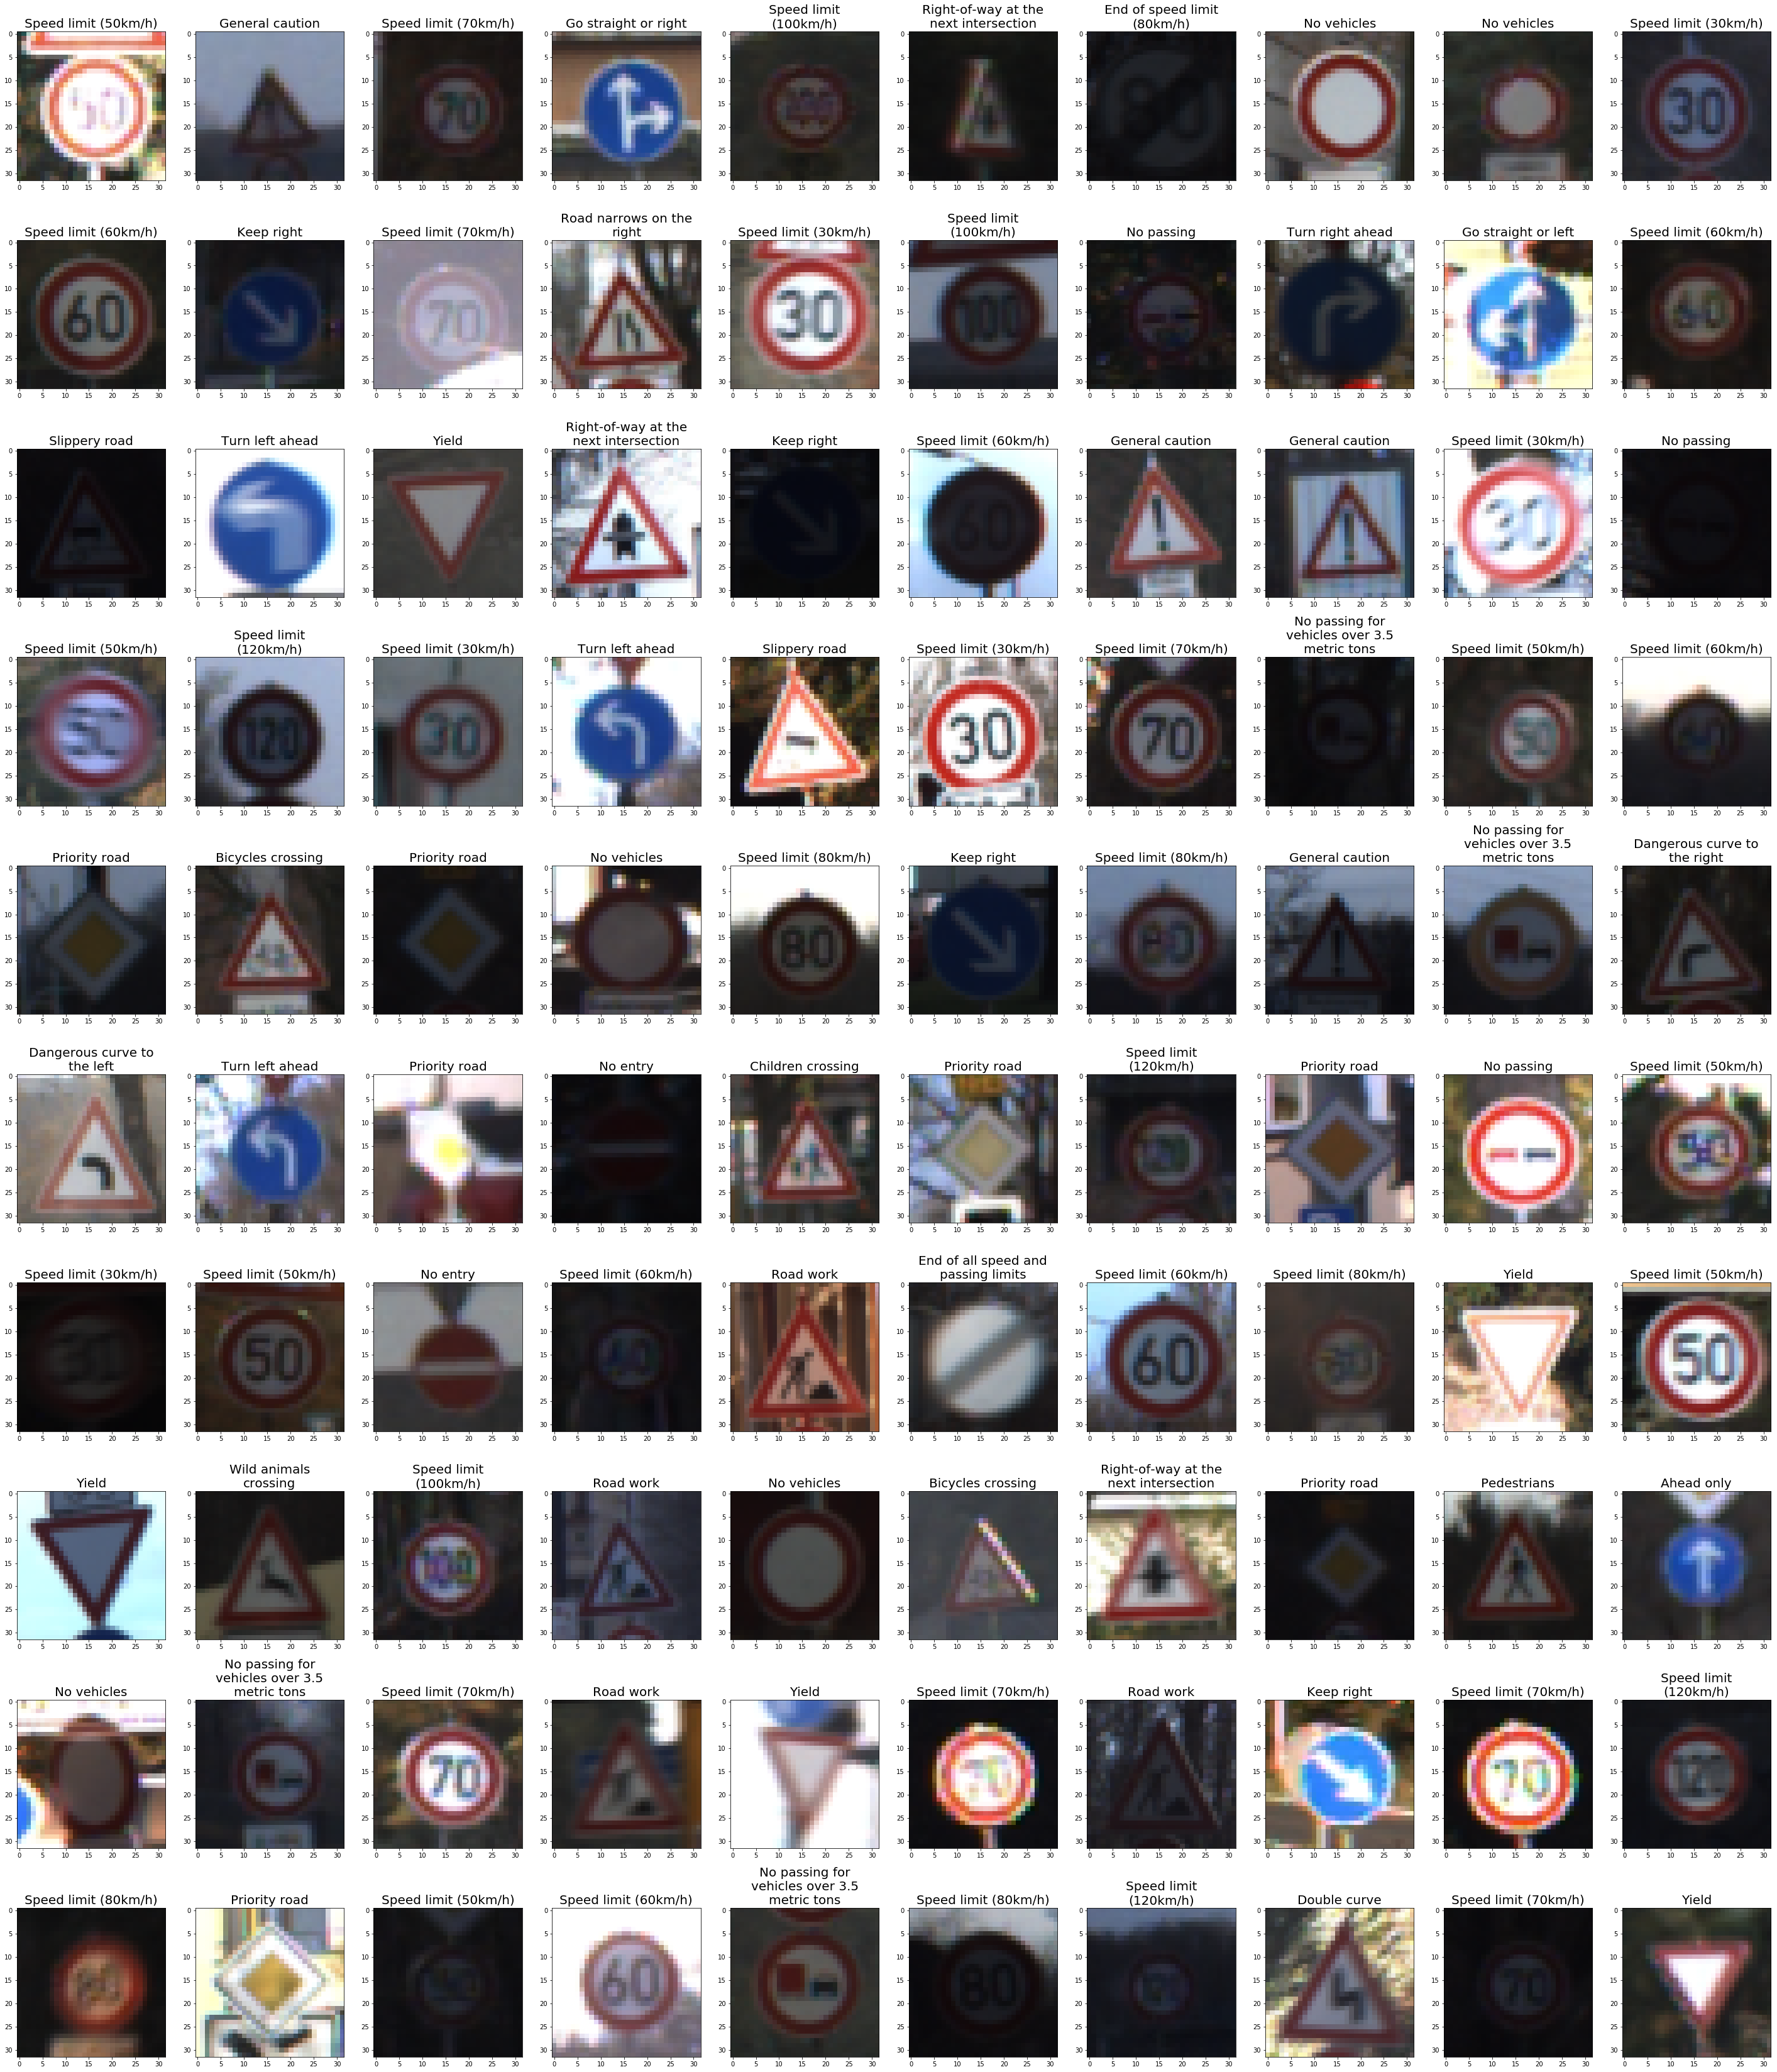

In [14]:
showImages(X_train, y_train)

Road narrows on the right
240


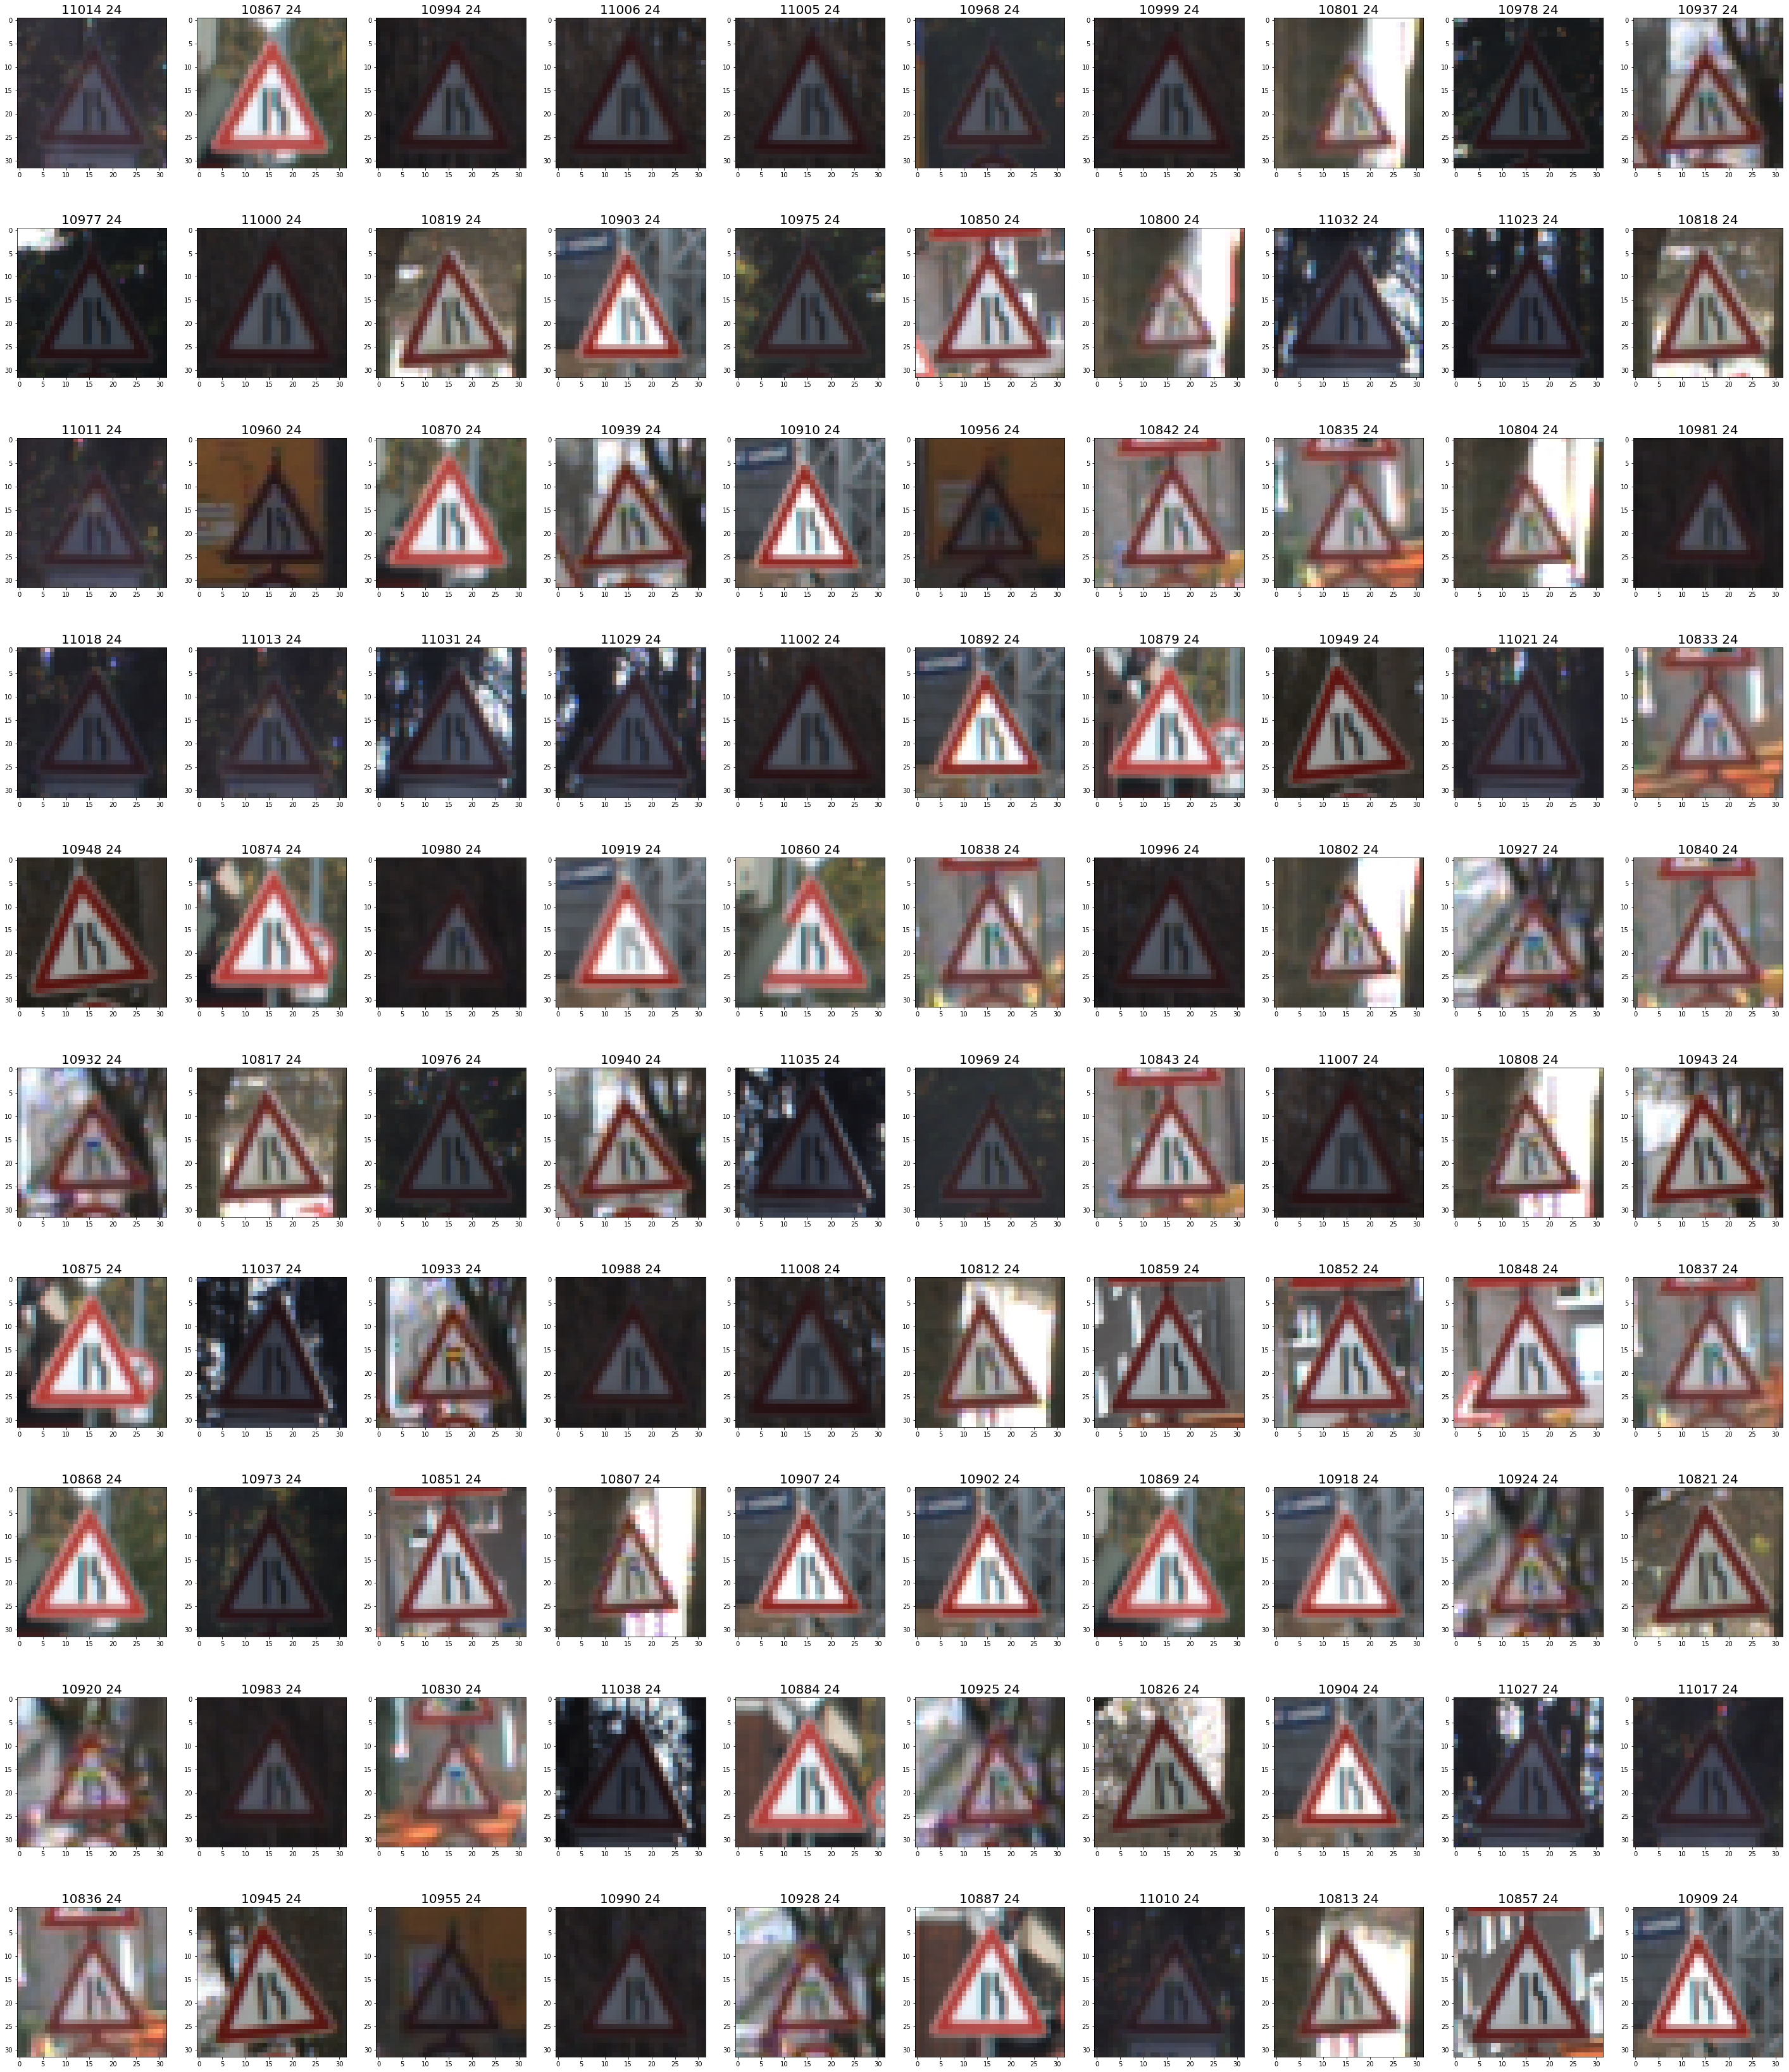

In [15]:
showImagesOfLabel(X_train, y_train, 24)

Road narrows on the right
30


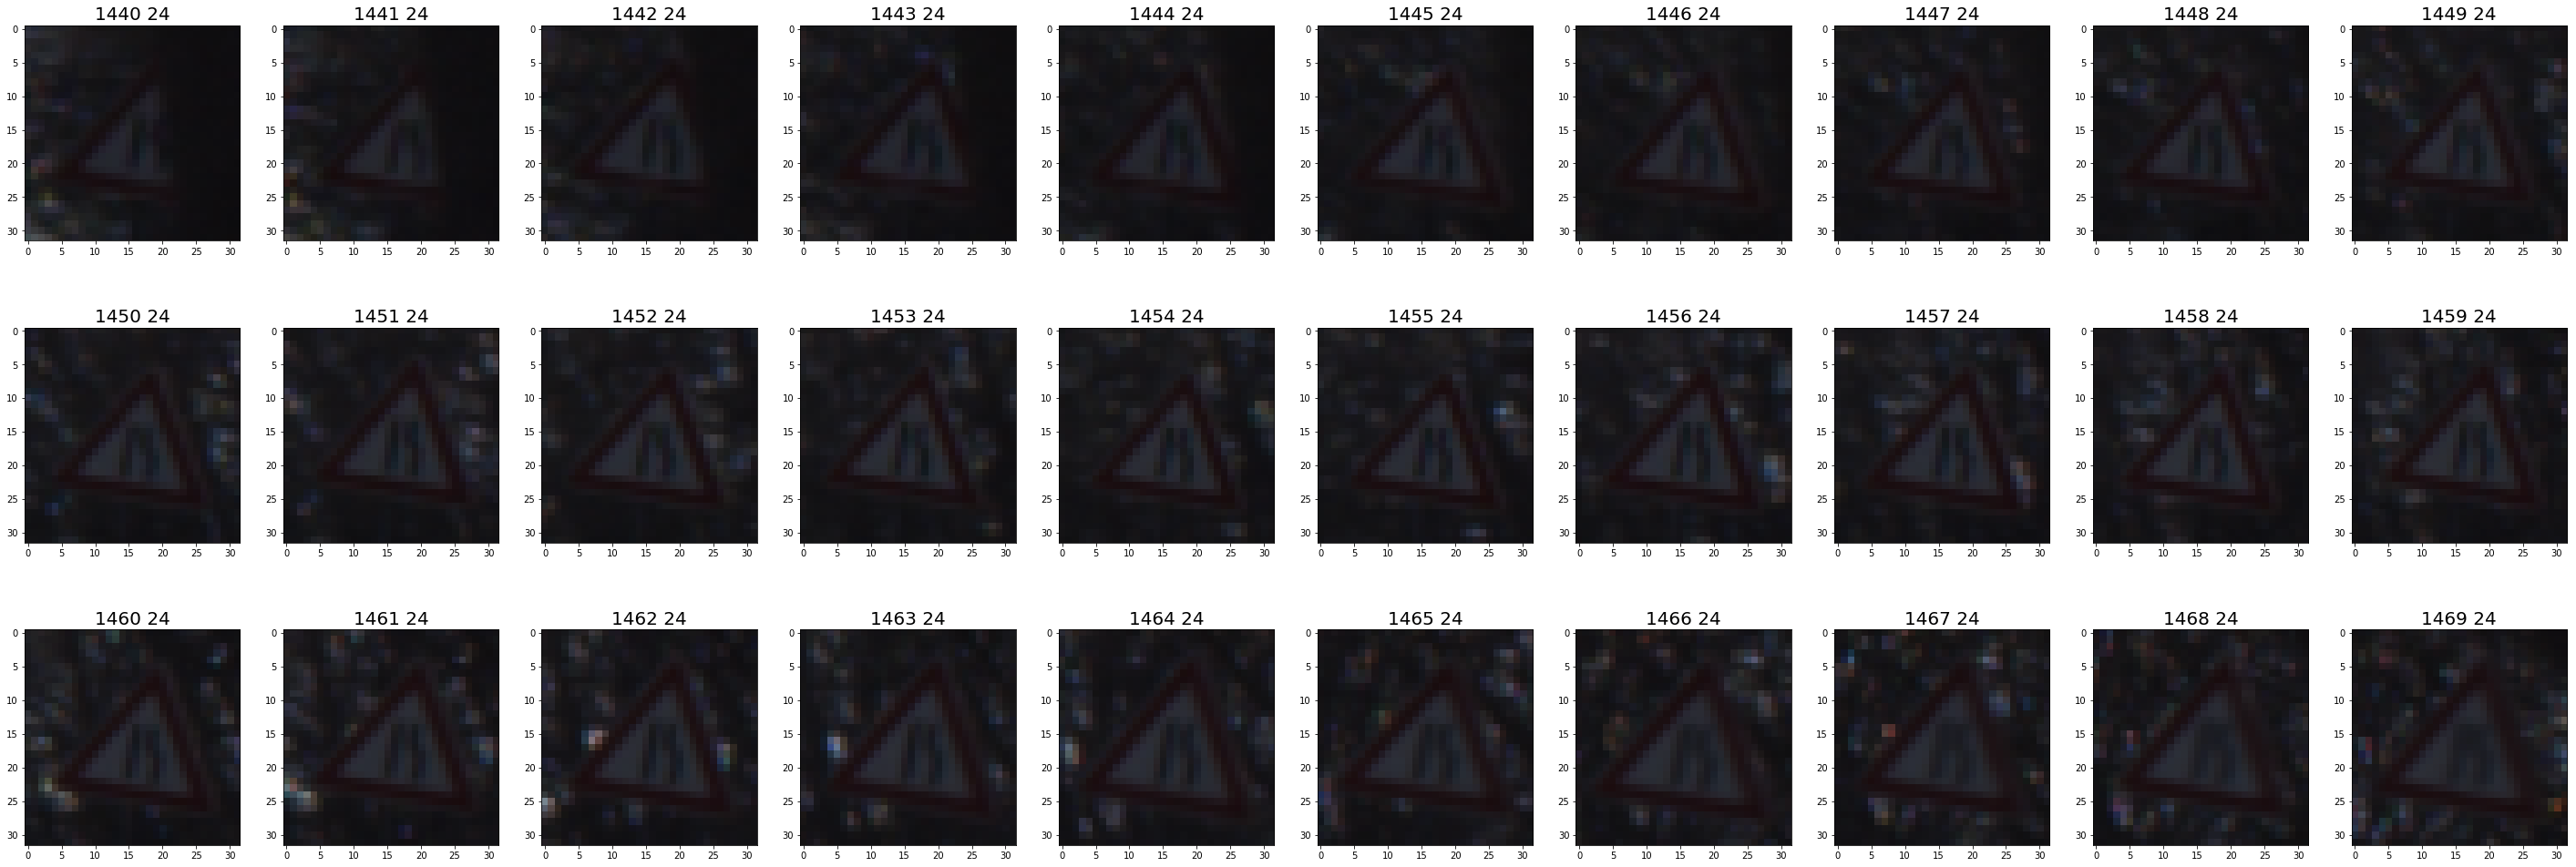

In [16]:
showImagesOfLabel(X_valid, y_valid, 24)

Roundabout mandatory
300


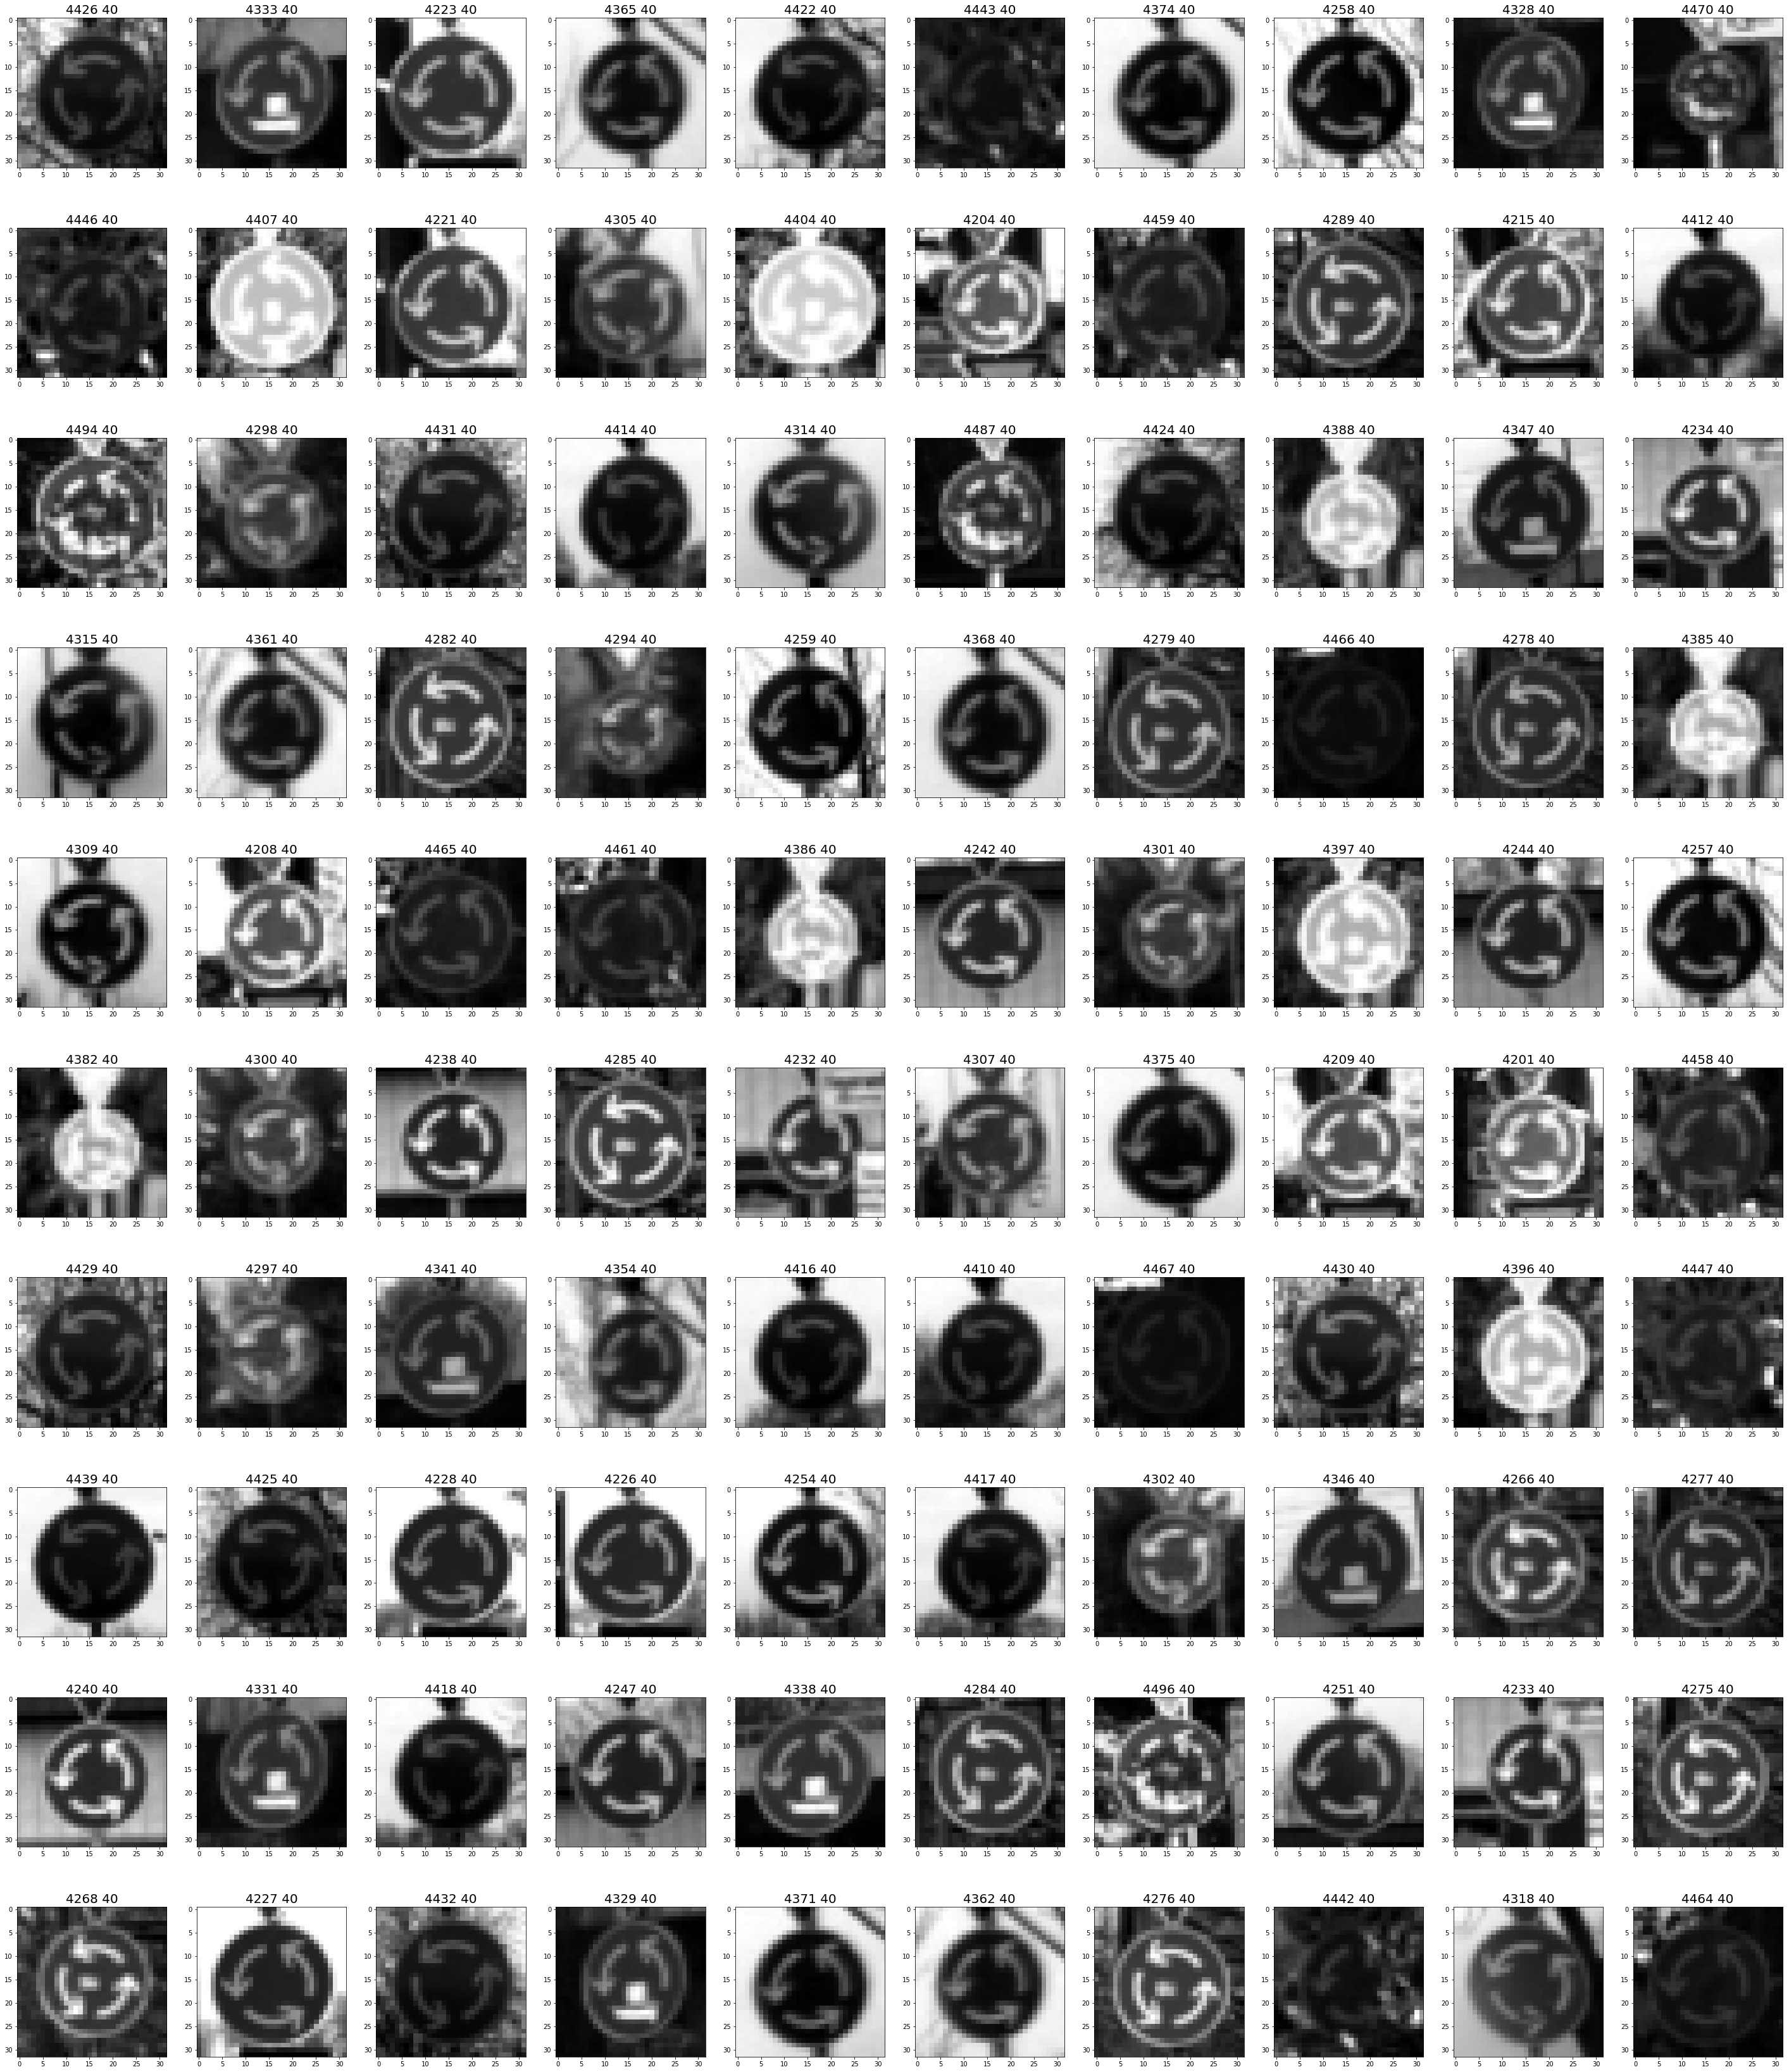

In [17]:
showImagesOfLabel(X_train_gray, y_train, 40, grayscale=True)

Roundabout mandatory
60


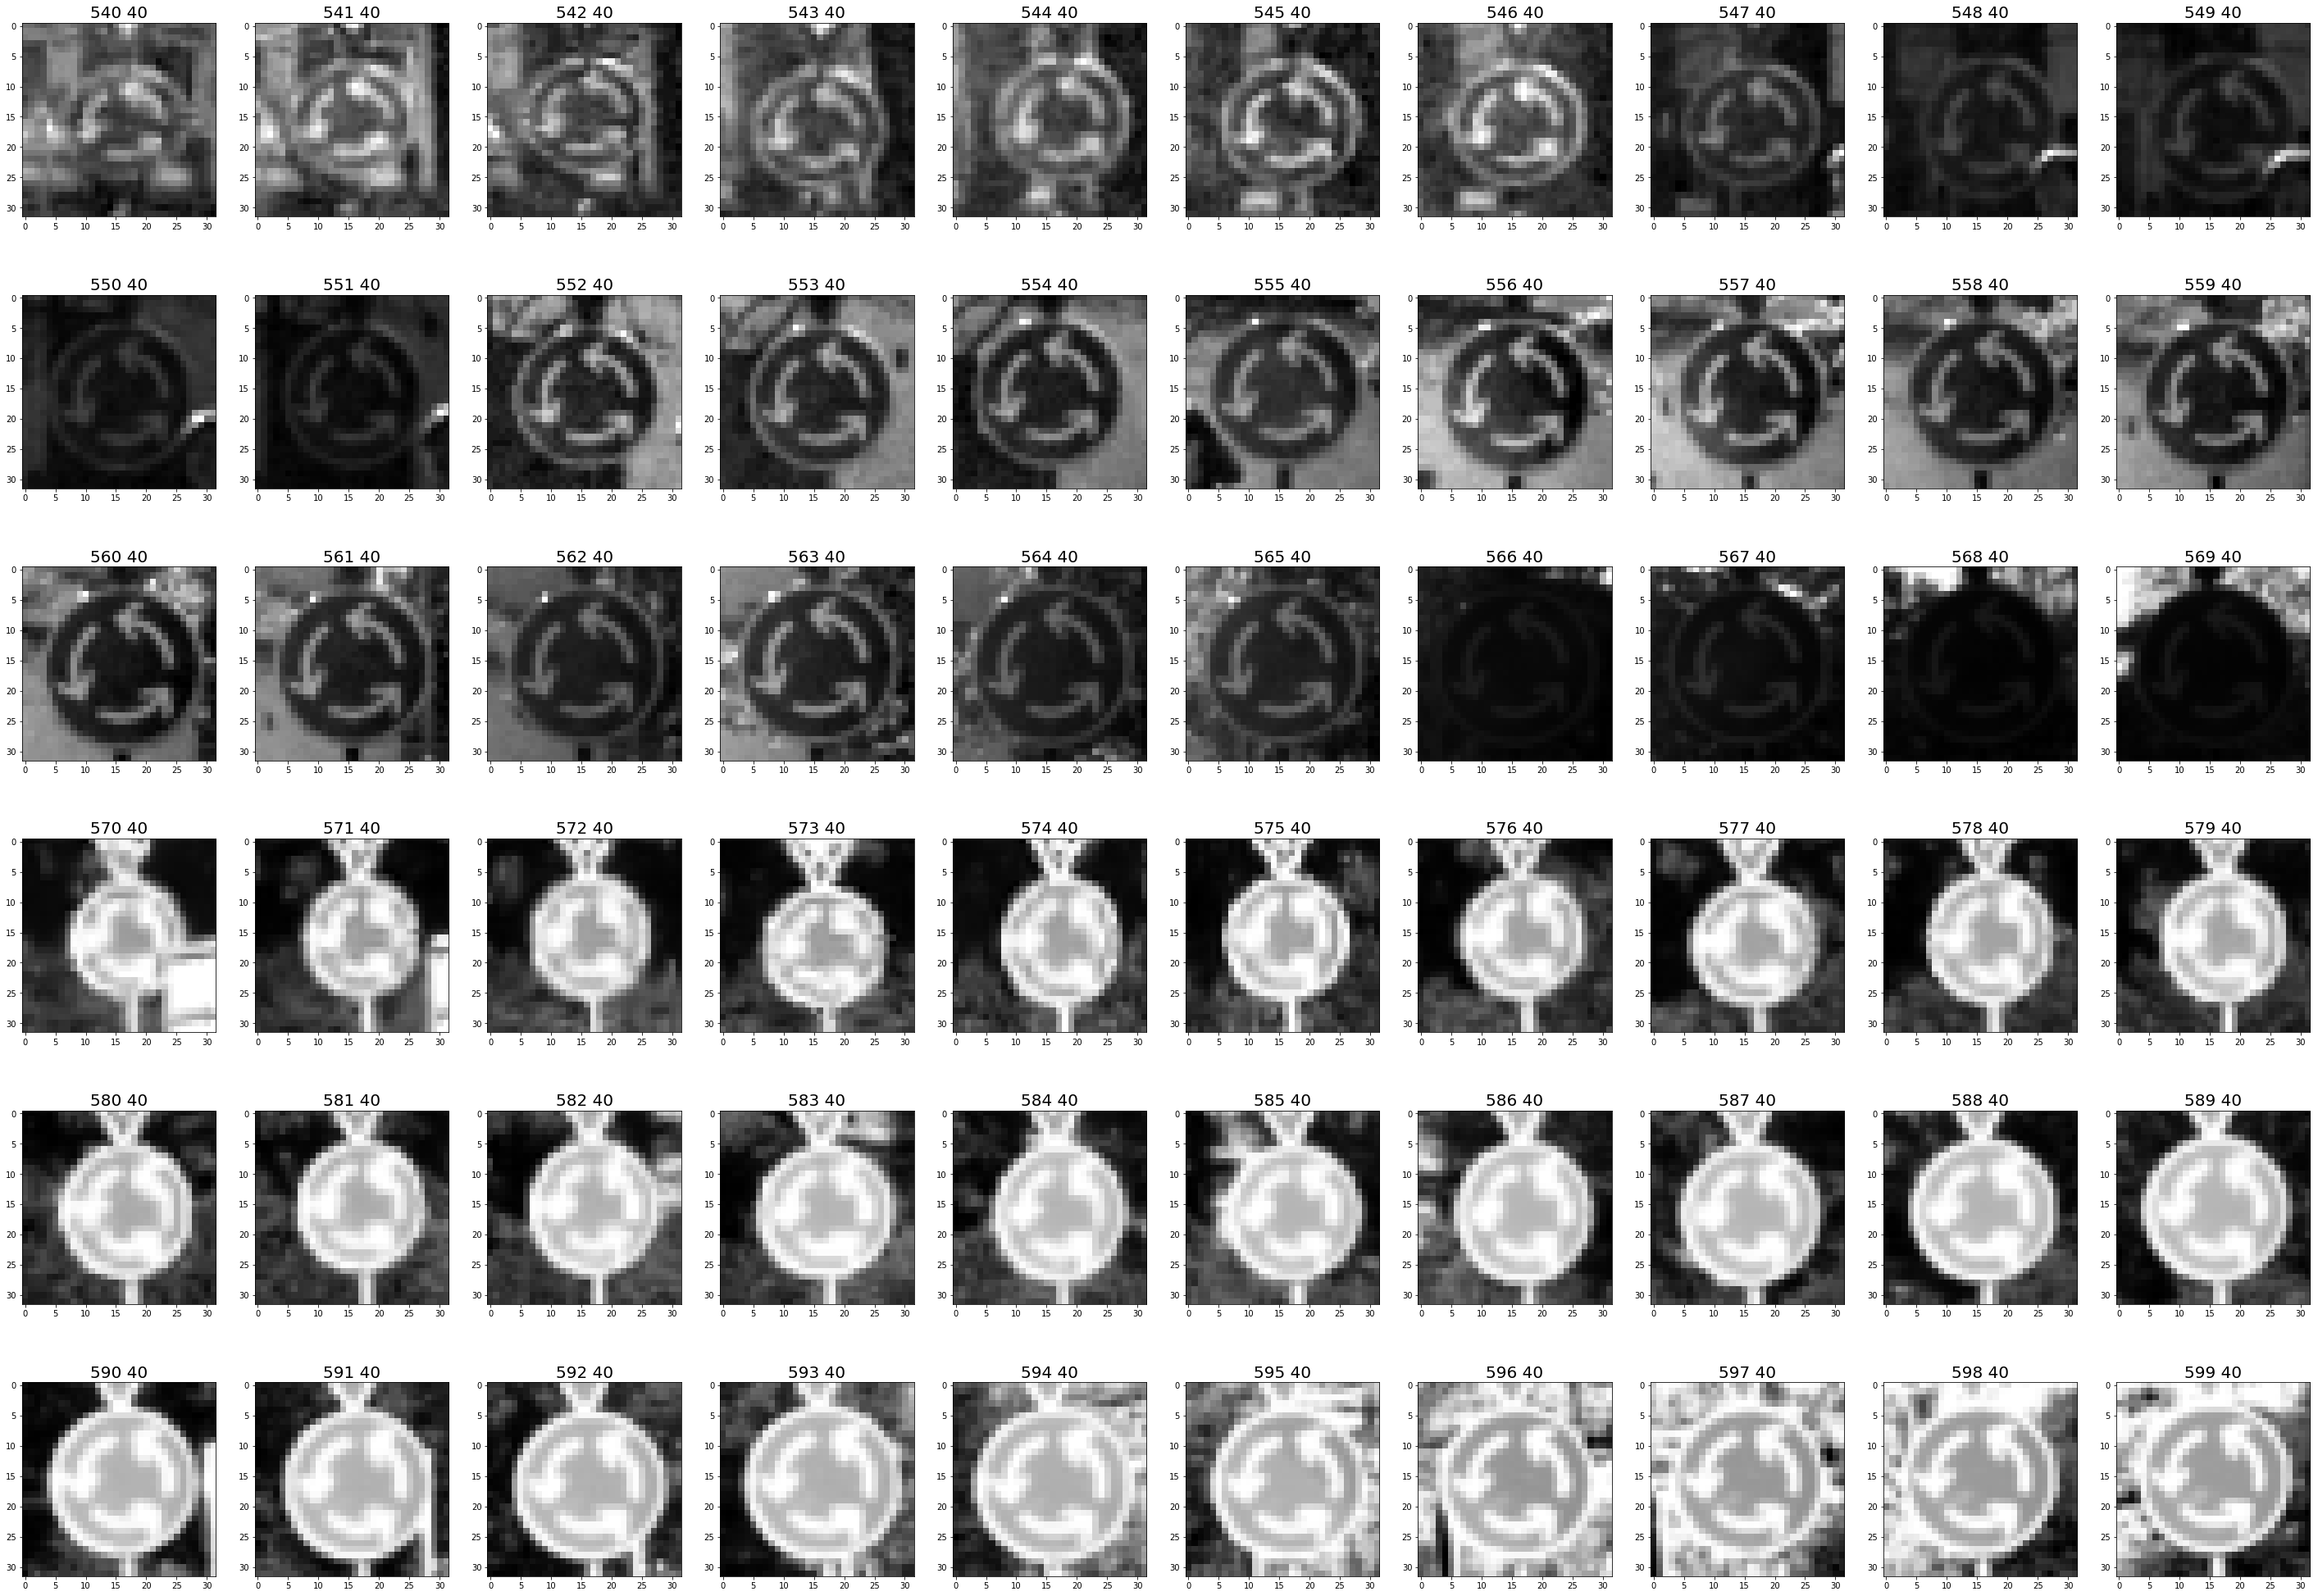

In [18]:
showImagesOfLabel(X_valid_gray, y_valid, 40, grayscale=True)

In [19]:
from collections import defaultdict
def showLabelDist(y_list, title):
    count = [0 for i in range(max(y_list) + 1)]
    labels = [i for i in range(max(y_list) + 1)]
    count_dict = defaultdict(int)
    for y in y_list:
        count[y] += 1
        count_dict[y] += 1
    plt.close('all')
    plt.title(title)
    plt.bar(labels, height=count)
    plt.show()
    
    for label in sorted(count_dict, key=lambda k: count_dict[k], reverse=True):
        print(str(label), ' ', signnames[label], ': ', count_dict[label])

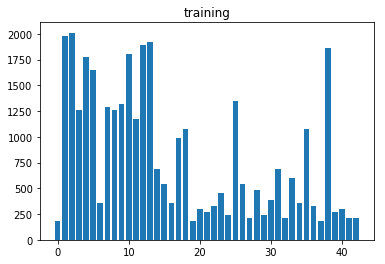

2   Speed limit (50km/h) :  2010
1   Speed limit (30km/h) :  1980
13   Yield :  1920
12   Priority road :  1890
38   Keep right :  1860
10   No passing for vehicles over 3.5 metric tons :  1800
4   Speed limit (70km/h) :  1770
5   Speed limit (80km/h) :  1650
25   Road work :  1350
9   No passing :  1320
7   Speed limit (100km/h) :  1290
3   Speed limit (60km/h) :  1260
8   Speed limit (120km/h) :  1260
11   Right-of-way at the next intersection :  1170
18   General caution :  1080
35   Ahead only :  1080
17   No entry :  990
14   Stop :  690
31   Wild animals crossing :  690
33   Turn right ahead :  599
15   No vehicles :  540
26   Traffic signals :  540
28   Children crossing :  480
23   Slippery road :  450
30   Beware of ice/snow :  390
6   End of speed limit (80km/h) :  360
16   Vehicles over 3.5 metric tons prohibited :  360
34   Turn left ahead :  360
22   Bumpy road :  330
36   Go straight or right :  330
20   Dangerous curve to the right :  300
40   Roundabout mandatory :  300

In [20]:
showLabelDist(y_train, 'training')

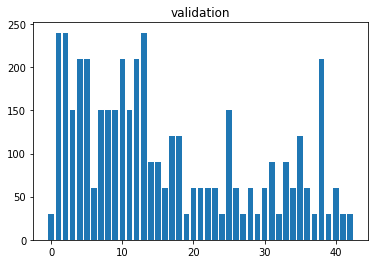

1   Speed limit (30km/h) :  240
2   Speed limit (50km/h) :  240
13   Yield :  240
4   Speed limit (70km/h) :  210
5   Speed limit (80km/h) :  210
10   No passing for vehicles over 3.5 metric tons :  210
12   Priority road :  210
38   Keep right :  210
3   Speed limit (60km/h) :  150
7   Speed limit (100km/h) :  150
8   Speed limit (120km/h) :  150
9   No passing :  150
11   Right-of-way at the next intersection :  150
25   Road work :  150
17   No entry :  120
18   General caution :  120
35   Ahead only :  120
14   Stop :  90
15   No vehicles :  90
31   Wild animals crossing :  90
33   Turn right ahead :  90
6   End of speed limit (80km/h) :  60
16   Vehicles over 3.5 metric tons prohibited :  60
20   Dangerous curve to the right :  60
21   Double curve :  60
22   Bumpy road :  60
23   Slippery road :  60
26   Traffic signals :  60
28   Children crossing :  60
30   Beware of ice/snow :  60
34   Turn left ahead :  60
36   Go straight or right :  60
40   Roundabout mandatory :  60
0   Sp

In [21]:
showLabelDist(y_valid, 'validation')

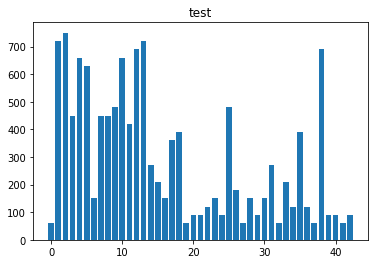

2   Speed limit (50km/h) :  750
1   Speed limit (30km/h) :  720
13   Yield :  720
12   Priority road :  690
38   Keep right :  690
4   Speed limit (70km/h) :  660
10   No passing for vehicles over 3.5 metric tons :  660
5   Speed limit (80km/h) :  630
9   No passing :  480
25   Road work :  480
3   Speed limit (60km/h) :  450
7   Speed limit (100km/h) :  450
8   Speed limit (120km/h) :  450
11   Right-of-way at the next intersection :  420
18   General caution :  390
35   Ahead only :  390
17   No entry :  360
14   Stop :  270
31   Wild animals crossing :  270
15   No vehicles :  210
33   Turn right ahead :  210
26   Traffic signals :  180
6   End of speed limit (80km/h) :  150
16   Vehicles over 3.5 metric tons prohibited :  150
23   Slippery road :  150
28   Children crossing :  150
30   Beware of ice/snow :  150
22   Bumpy road :  120
34   Turn left ahead :  120
36   Go straight or right :  120
20   Dangerous curve to the right :  90
21   Double curve :  90
24   Road narrows on the 

In [22]:
showLabelDist(y_test, 'test')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
def normalize(X, mean=None, stddev=None):
    X=X.astype(np.int16)
    mean = mean if mean is not None else np.mean(X, axis=0)
    stddev = stddev if stddev is not None else np.std(X, axis=0)
    return (X - mean) / stddev, mean, stddev

X_train_norm, mean, stddev = normalize(X_train)
X_valid_norm, _, _ = normalize(X_valid, mean, stddev)
X_test_norm, _, _ = normalize(X_test, mean, stddev)

In [5]:
def normalizeGrayscale(X):
    X=X.astype(np.int16)
    return np.reshape((X - 128) / 128, (-1, 32, 32, 1))

X_train_gray_norm = normalizeGrayscale(X_train_gray)
X_valid_gray_norm = normalizeGrayscale(X_valid_gray)
X_test_gray_norm = normalizeGrayscale(X_test_gray)

### Model Architecture

In [6]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
import time
from sklearn.utils import shuffle

class Model:
    def __init__(self, n_class, use_gray):
        mu = 0
        sigma = 0.1
        n_img_channel = 1 if use_gray else 3
        
        self.X = tf.placeholder(tf.float32, shape=(None, 32, 32, n_img_channel))
        self.y = tf.placeholder(tf.int32, shape=(None))
        self.learn_rate = tf.placeholder(tf.float32)
        self.keep_prob = tf.placeholder(tf.float32)
        self.epoch = tf.Variable(0, name='epoch', trainable=False)
        
        #Conv layer 1
        conv1_depth = 32
        self.conv_W_1 = tf.Variable(tf.truncated_normal(shape=[3, 3, n_img_channel, conv1_depth], mean=mu, stddev=sigma), name='conv_W_1')
        self.conv_b_1 = tf.Variable(tf.zeros(conv1_depth), name='conv_b_1')
        conv1 = tf.nn.relu(tf.add(tf.nn.conv2d(self.X, self.conv_W_1, strides=[1, 1, 1, 1], padding='VALID'), self.conv_b_1))
        self.conv1_relu = conv1
        print(conv1.get_shape().as_list())
        conv1 = tf.nn.max_pool(conv1, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='VALID')
        print(conv1.get_shape().as_list())

        #Conv layer 2
        conv2_depth = 32
        self.conv_W_2 = tf.Variable(tf.truncated_normal(shape=[3, 3, conv1_depth, conv2_depth], mean=mu, stddev=sigma), name='conv_W_2')
        self.conv_b_2 = tf.Variable(tf.zeros(conv2_depth), name='conv_b_2')
        conv2 = tf.nn.relu(tf.add(tf.nn.conv2d(conv1, self.conv_W_2, strides=[1, 1, 1, 1], padding='VALID'), self.conv_b_2))
        self.conv2_relu = conv2
        print(conv2.get_shape().as_list())
        conv2 = tf.nn.max_pool(conv2, ksize=[1, 3, 3, 1], strides=[1, 2, 2, 1], padding='VALID')
        print(conv2.get_shape().as_list())

        fc_in = flatten(conv2)

        # Fully connected layers
        in_size = fc_in.get_shape().as_list()[1]
        print(in_size)
        fc1_size = 512
        self.W_1 = tf.Variable(tf.truncated_normal(shape=[in_size, fc1_size], mean=mu, stddev=sigma), name='fc_W_1')
        self.b_1 = tf.Variable(tf.zeros(fc1_size), name='fc_b_1')
        fc1 = tf.nn.relu(tf.add(tf.matmul(fc_in, self.W_1), self.b_1))
        fc1 = tf.nn.dropout(fc1, self.keep_prob)
        
        fc2_size = 512
        self.W_2 = tf.Variable(tf.truncated_normal(shape=[fc1_size, fc2_size], mean=mu, stddev=sigma), name='fc_W_2')
        self.b_2 = tf.Variable(tf.zeros(fc2_size), name='fc_b_2')
        fc2 = tf.nn.relu(tf.add(tf.matmul(fc1, self.W_2), self.b_2))
        fc2 = tf.nn.dropout(fc2, self.keep_prob)

        self.W_3 = tf.Variable(tf.truncated_normal(shape=[fc2_size, n_classes]), name='fc_W_3')
        self.b_3 = tf.Variable(tf.zeros(n_classes), name='fc_b_3')
        self.logits = tf.add(tf.matmul(fc2, self.W_3), self.b_3)

        # Training
        one_hot_y = tf.one_hot(self.y, n_classes)
        self.loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=one_hot_y))
        optimizer = tf.train.AdamOptimizer(learning_rate = self.learn_rate)
        self.train_op = optimizer.minimize(self.loss)
        self.increment_epoch_op = tf.assign_add(self.epoch, 1)

        # Validation
        self.prediction = tf.argmax(self.logits, axis=1);
        correct = tf.equal(self.prediction, tf.argmax(one_hot_y, axis=1))
        self.accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

    def train(self, sess, X_train, y_train, learn_rate, keep_prob, batch_size=128):
        n = len(X_train)
        X_train, y_train = shuffle(X_train, y_train)
        losses = []
        for i in range(0, n, batch_size):
            batch_X = X_train[i:i+batch_size]
            batch_y = y_train[i:i+batch_size]
            _, batch_loss = sess.run([self.train_op, self.loss],
                                     feed_dict={self.X: batch_X, self.y: batch_y,
                                                self.learn_rate: learn_rate, self.keep_prob: keep_prob})
            losses.append(batch_loss)

        return sess.run(self.increment_epoch_op), np.mean(losses)

    def validate(self, sess, X_valid, y_valid, batch_size=4096):
        n = len(X_valid)
        n_correct = 0
        predictions = np.array([], dtype=np.uint8)
        for i in range(0, n, batch_size):
            batch_X = X_valid[i:i+batch_size]
            batch_y = y_valid[i:i+batch_size]
            batch_accu, pred = sess.run([self.accuracy, self.prediction], feed_dict={self.X: batch_X, self.y: batch_y, self.keep_prob: 1.0})
            predictions = np.concatenate((predictions, pred))
            n_correct += batch_accu * len(batch_X)
        return predictions, n_correct / n

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
def save(sess, path='ckpt/p2_model'):
    saver = tf.train.Saver()
    save_path = saver.save(sess, path)

    print('Session saved at %s' % save_path)

    return save_path

def restore(path='ckpt/p2_model'):
    sess = tf.Session()
    saver = tf.train.Saver()
    saver.restore(sess, path)

    print('Session restored from %s' % path)

    return sess

In [8]:
use_gray = True

X_train_for_show = X_train_gray if use_gray else X_train
X_train_for_model = X_train_gray_norm if use_gray else X_train_norm
X_valid_for_show = X_valid_gray if use_gray else X_valid
X_valid_for_model = X_valid_gray_norm if use_gray else X_valid_norm
X_test_for_show = X_test_gray if use_gray else X_test
X_test_for_model = X_test_gray_norm if use_gray else X_test_norm

cmap = 'gray' if use_gray else None

In [9]:
model = Model(n_classes, use_gray)

[None, 30, 30, 32]
[None, 14, 14, 32]
[None, 12, 12, 32]
[None, 5, 5, 32]
800


In [10]:
doRestore = True
if doRestore:
    sess = restore('ckpt_gray/p2_model' if use_gray else 'ckpt_rgb/p2_model')
else:
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

Session restored from ckpt_gray/p2_model


In [ ]:
learn_rate = 0.001
keep_prob = 0.5
best = 0.0
last = 0.0
n_learn_rate_decay = 0
final_learn_rate_epoch = 0
stopped = False

while not stopped:
    start = time.time()
    print('Epoch trained: %d. Loss: %f' % (model.train(sess, X_train_for_model, y_train, learn_rate, keep_prob)))
    print('Took %f min' % ((time.time() - start) / 60))
    _, v = model.validate(sess, X_valid_for_model, y_valid)
    print('Validation accuracy: %f' % v)
    if v > best:
        save(sess)
        best = v
    # if validation accuracy doesn't get better, decrease the learning rate
    elif last > v and n_learn_rate_decay < 3:
        learn_rate /= 10
        n_learn_rate_decay += 1
        print("New learn_rate %f" % learn_rate)
    # this should be reached in 10 ~ 20 epochs
    if n_learn_rate_decay == 3:
        final_learn_rate_epoch += 1
        # train 30 more epochs at the smallest learning rate
        if final_learn_rate_epoch > 30:
            stopped = True
    last = v

In [11]:
def drawConfusionMatrix(predictions, labels):
    confusion_matrix = np.zeros((n_classes+1, n_classes+1), dtype=np.float32)
    for p, y in zip(predictions, labels):
        confusion_matrix[p, y] += 1
    
    # last column is precisions, and last row is recalls
    for i in range(n_classes):
        confusion_matrix[i, n_classes] = np.round(confusion_matrix[i, i] / np.sum(confusion_matrix[i,:]), 2)
        confusion_matrix[n_classes, i] = np.round(confusion_matrix[i, i] / np.sum(confusion_matrix[:,i]), 2)
    
    fig, ax = plt.subplots(figsize=(20,20))
    ax.matshow(confusion_matrix, cmap=plt.cm.Blues)

    for i in range(n_classes+1):
        for j in range(n_classes+1):
            c = confusion_matrix[j,i]
            t = str(c) if i == n_classes or j == n_classes else str(int(c))
            ax.text(i, j, t, va='center', ha='center')

In [12]:
_, accuracy = model.validate(sess, X_train_for_model, y_train)
print('Training accuracy: %f' % accuracy)

Training accuracy: 0.998218


Validation accuracy: 0.957370


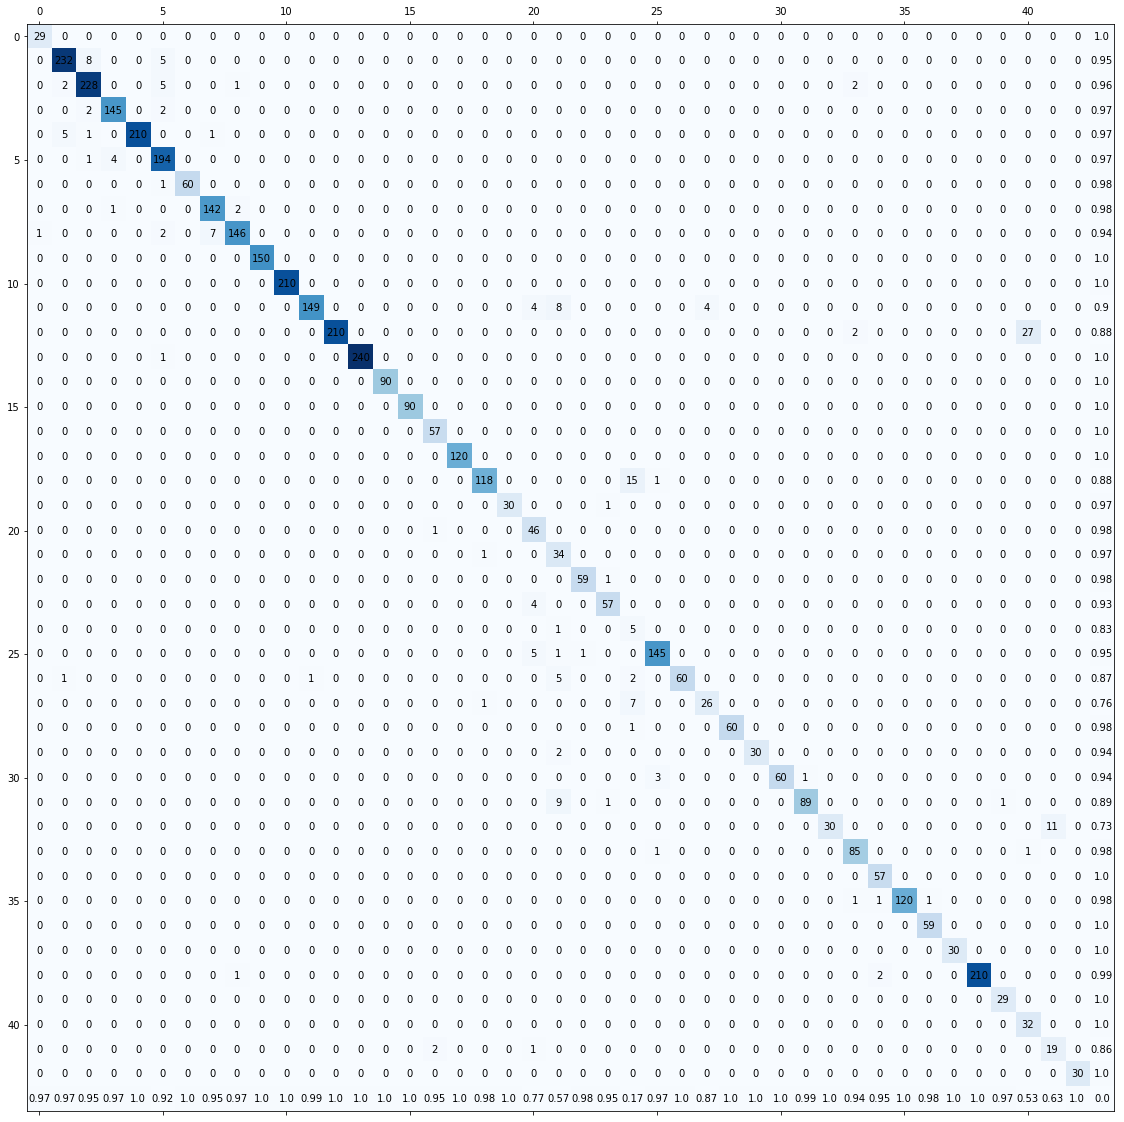

In [13]:
predictions, accuracy = model.validate(sess, X_valid_for_model, y_valid)
print('Validation accuracy: %f' % accuracy)
drawConfusionMatrix(predictions, y_valid)

Test accuracy: 0.941093


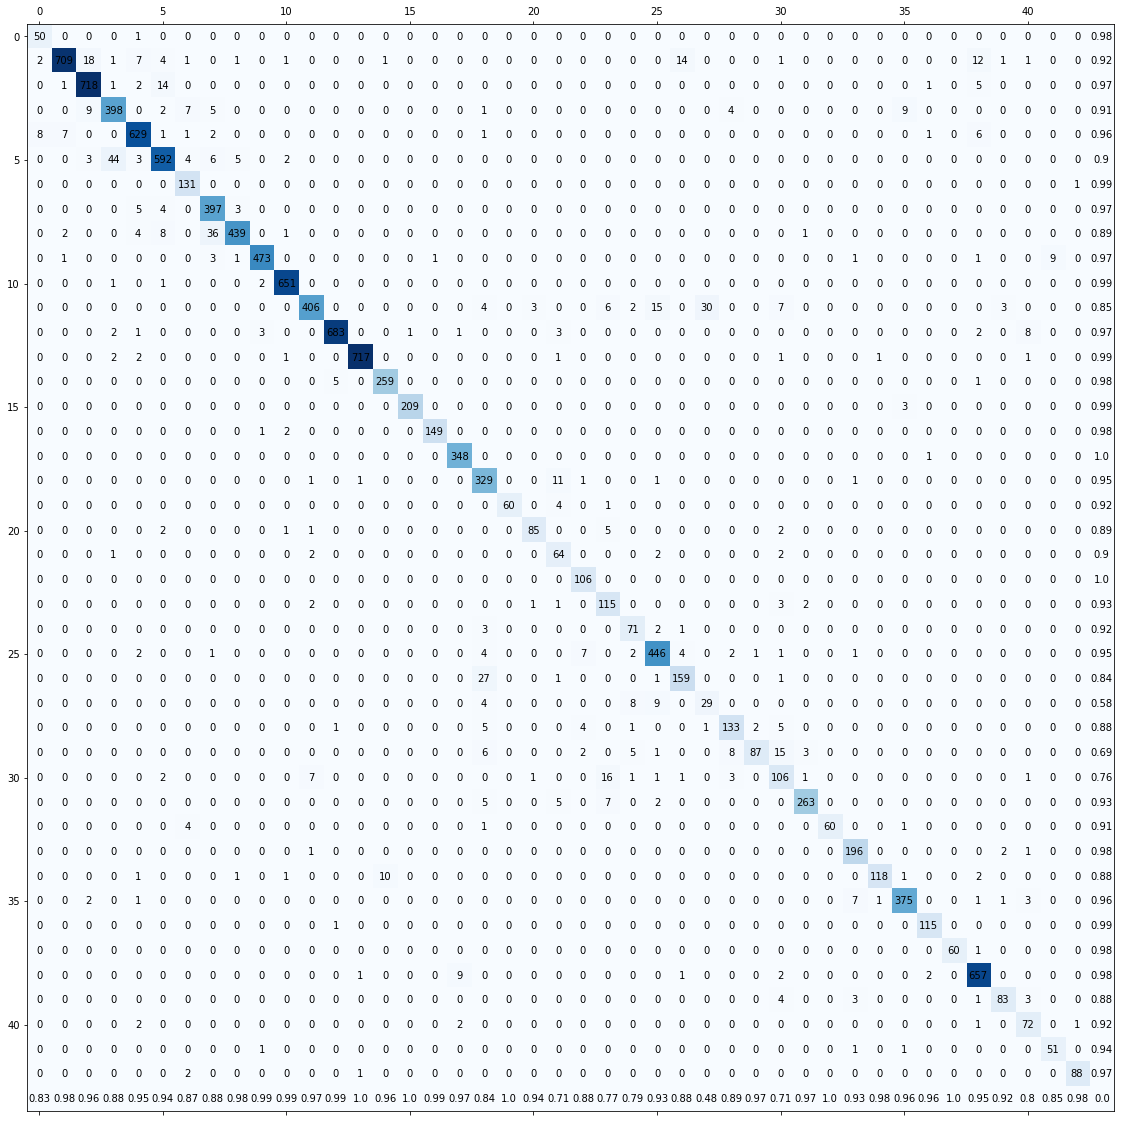

In [41]:
predictions, accuracy = model.validate(sess, X_test_for_model, y_test)
print('Test accuracy: %f' % accuracy)
drawConfusionMatrix(predictions, y_test)

In [23]:
def findOne(label):
    i = random.randint(0, n_valid-1)
    for j in range(i, n_valid):
        if y_valid[j] == label:
            return j
    for j in range(i, -1, -1):
        if y_valid[j] == label:
            return j
        
def findAll(label):
    ret = []
    for j in range(n_valid):
        if y_valid[j] == label:
            ret.append(j)
    return ret

def validateAll(label):
    print('Correct label: %s' % signnames[label])
    cnt = 0
    fig = plt.figure(figsize=(40,60))
    for i in findAll(label):
        pred, accu = model.validate(sess, X_valid_for_model[i:i+1], y_valid[i:i+1])
        if accu < 1.0:
            plt.subplot(10, 10, 2 * cnt + 1)
            plt.title(wrapTitle('Wrong sample: %d' % i), fontsize=20)
            plt.imshow(X_valid_for_show[i], cmap=cmap)

            wrong = pred[0]
            i = findOne(wrong)
            plt.subplot(10, 10, 2 * cnt + 2)
            plt.title(wrapTitle('Wrong label: %d %s' % (wrong, signnames[wrong])), fontsize=20)
            plt.imshow(X_valid_for_show[i], cmap=cmap)
            
            cnt += 1

Correct label: Road narrows on the right


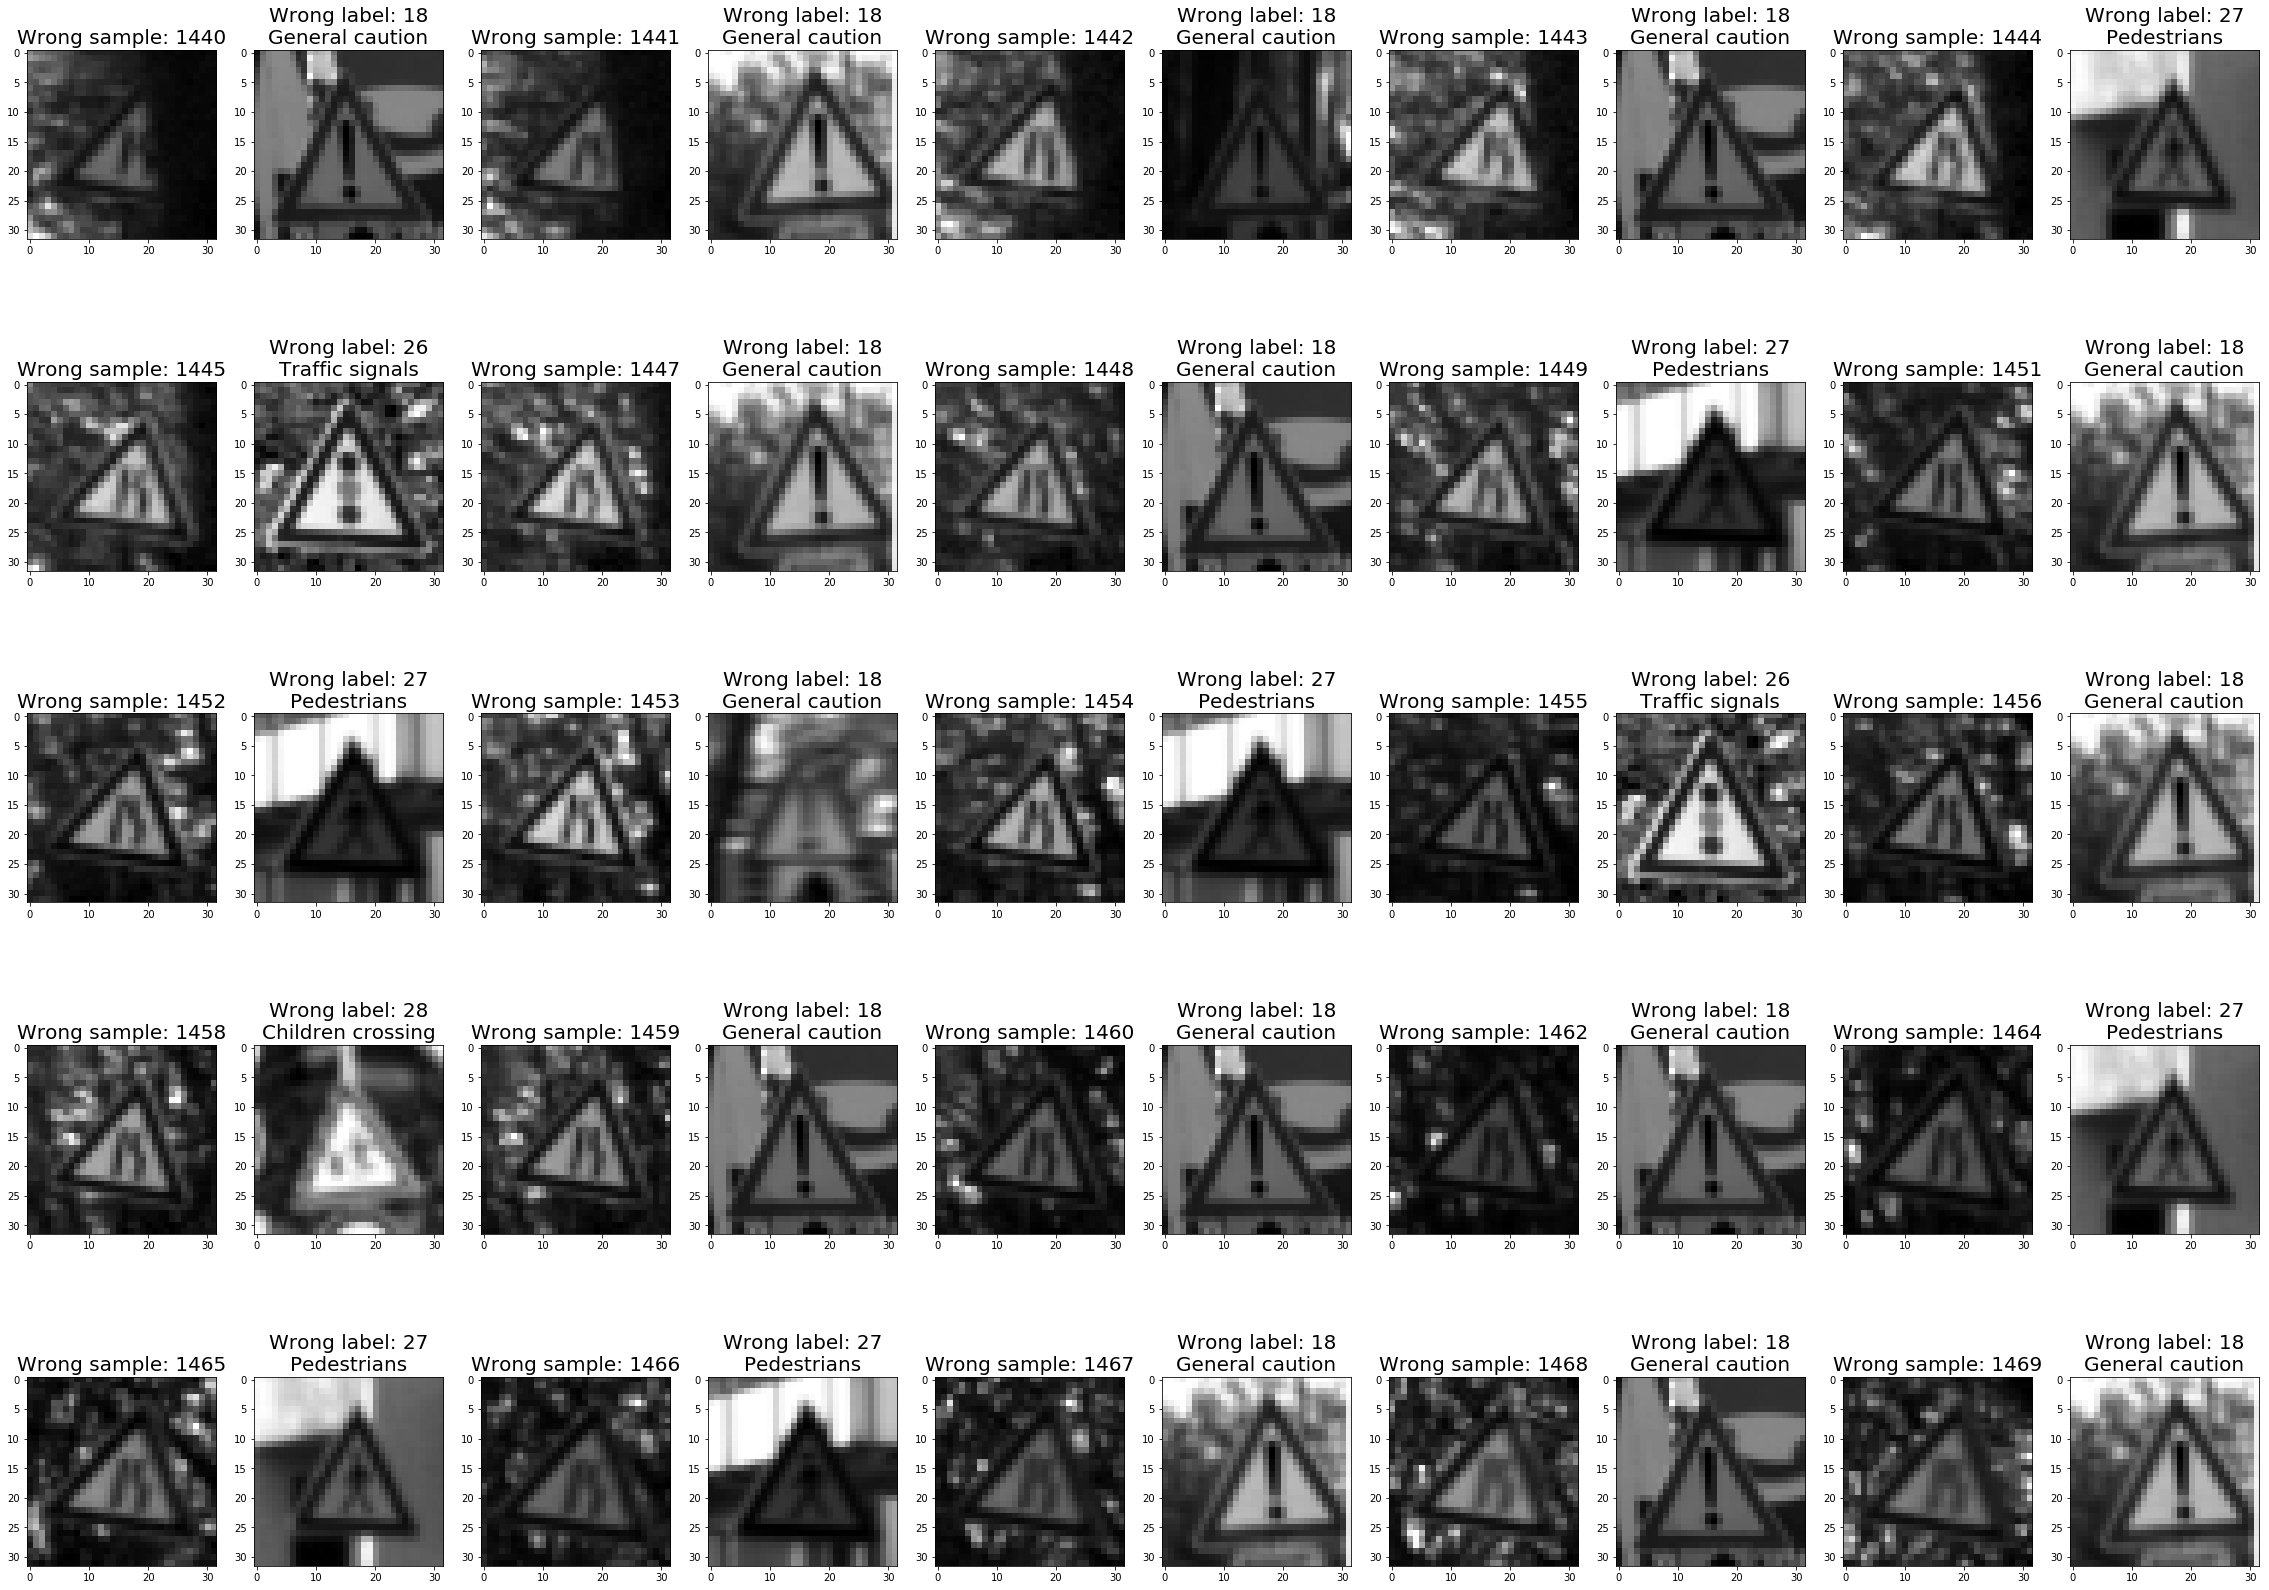

In [24]:
# show how they're wrong
validateAll(24)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

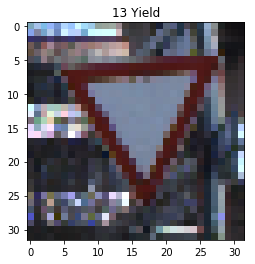

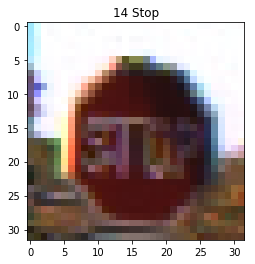

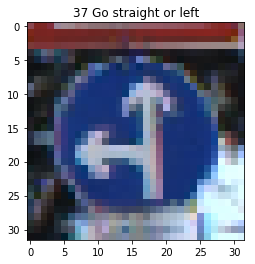

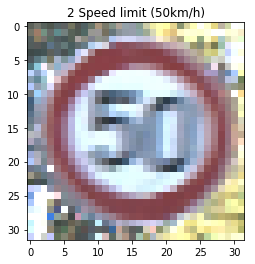

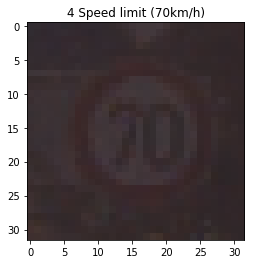

In [25]:
import os
from PIL import Image

img_dir = 'five_images'
my_imgs = []
my_labels = []
for f in os.listdir(img_dir):
    if not f.endswith('.ppm'):
        continue
    img = np.asarray(Image.open('%s/%s' % (img_dir, f)).resize([32,32]), dtype=np.uint8)
    # file name is the label
    label = int(f.split('.')[0])
    my_imgs.append(img)
    my_labels.append(label)
    plt.figure()
    plt.title('%d %s' % (label, signnames[label]))
    plt.imshow(img)

### Predict the Sign Type for Each Image

In [26]:
X_new = np.reshape(normalizeGrayscale(convertToGrayscale(np.array(my_imgs))), (-1, 32, 32, 1))
y_new = np.array(my_labels)
prediction, accuracy = model.validate(sess, X_new, y_new)

### Analyze Performance

In [27]:
print(prediction)
print(y_new)
print(accuracy)

[13 14 37  2  4]
[13 14 37  2  4]
1.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [28]:
print(sess.run(tf.nn.top_k(tf.nn.softmax(model.logits), k=5), feed_dict={model.X: X_new, model.y: y_new, model.keep_prob: 1.0}))

TopKV2(values=array([[  1.00000000e+00,   1.96222812e-21,   9.52595297e-24,
          2.67490170e-24,   1.12220404e-24],
       [  6.34029269e-01,   1.36697501e-01,   1.24913268e-01,
          1.67041179e-02,   1.17385332e-02],
       [  1.00000000e+00,   1.78769798e-15,   6.35076399e-16,
          4.21724172e-17,   2.61412350e-17],
       [  9.99999881e-01,   1.05545944e-07,   7.36410672e-12,
          2.28746362e-12,   3.77574050e-14],
       [  9.98207331e-01,   1.43345946e-03,   1.34982358e-04,
          1.01378646e-04,   1.32605501e-05]], dtype=float32), indices=array([[13, 35,  9, 15, 29],
       [14,  3, 34, 32, 28],
       [37, 35, 26, 30, 39],
       [ 2,  1, 14,  5,  3],
       [ 4,  1,  0,  8, 33]], dtype=int32))


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, sess, X, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={X : image_input})
    featuremaps = activation.shape[3]

    for featuremap in range(featuremaps):
        plt.subplot(10,10, featuremap+11) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap), fontsize=5) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [30]:
def showConv(img_index, conv, sess, X):
    plt.tight_layout()
    plt.figure(figsize=(10,10))
    plt.subplot(10, 10, 1)
    plt.imshow(X_valid_for_show[img_index], cmap=cmap)
    outputFeatureMap(np.reshape(X_valid_for_model[img_index], [-1, 32, 32, X_valid_for_model.shape[3]]), conv, sess, X)

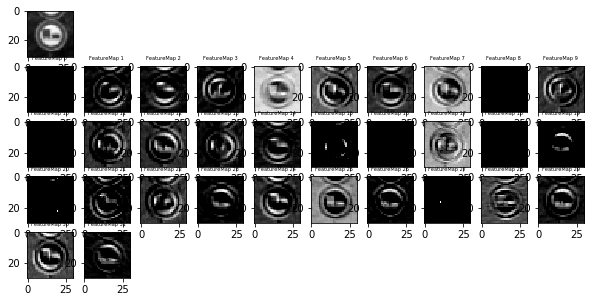

In [39]:
img_index = 2315
showConv(img_index, model.conv1_relu, sess, model.X)

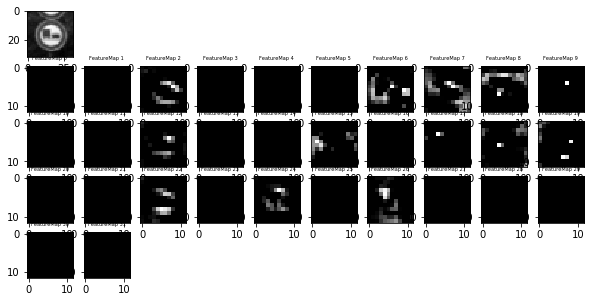

In [40]:
showConv(img_index, model.conv2_relu, sess, model.X)